In [1]:
# visualize VAE, pyradiomics as well as CNN models

In [1]:
# import libraries
import os
import os.path as osp
import sys
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# load results
baseline_root = "/labs/gevaertlab/users/yyhhli/code/vae/baselines"
pyradiomics_result = osp.join(baseline_root, "pyradiomics", "results")
cnn_result = osp.join(baseline_root, "cnn", "results")


In [5]:
sys.path.insert(1, "/labs/gevaertlab/users/yyhhli/code/vae")
from datasets.label.label_stanfordradiogenomics import (
    LabelStfAJCC, LabelStfEGFRMutation, LabelStfHisGrade, LabelStfKRASMutation,
    LabelStfNStage, LabelStfReGroup, LabelStfRGLymphInvasion,
    LabelStfRGPleuralInvasion, LabelStfTStage)
label_list = [LabelStfTStage, LabelStfNStage, LabelStfAJCC, LabelStfHisGrade,
                  LabelStfRGLymphInvasion, LabelStfEGFRMutation, LabelStfKRASMutation, LabelStfRGPleuralInvasion]

/labs/gevaertlab/users/yyhhli/miniconda3/envs/lungvae38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
label_names = [label_list[i]().name for i in range(len(label_list))]

In [7]:
label_names

['Pathological T stage',
 'Pathological N stage',
 'AJCC Staging (Version 7)',
 'Histopathological Grade',
 'Lymphovascular invasion',
 'EGFR mutation status',
 'KRAS mutation status',
 'Pleural invasion (elastic, visceral, or parietal)']

In [7]:
label_name = 'Pathological T stage'

In [8]:
# read json file into a dictionary
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [9]:
pyra_metrics = pd.read_csv(osp.join(pyradiomics_result, f"results_xgboost_{label_name}.csv"))
cnn_metrics = pd.DataFrame(read_json(osp.join(cnn_result, f"{label_name}.json")))

In [10]:
pyra_metrics

,Accuracy,F1,Precision,Recall
0,0.714286,0.712821,0.718750,0.714286
1,0.750000,0.747097,0.762032,0.750000
2,0.703704,0.698765,0.726362,0.703704
3,0.814815,0.814304,0.816049,0.814815
4,0.703704,0.703704,0.703704,0.703704


In [11]:
pd.DataFrame(cnn_metrics)

,Accuracy,F1,Precision,Recall,AUROC,AUPRC
0,0.601190,0.601063,0.601320,0.601190,0.601190,0.561214
1,0.636905,0.631141,0.646032,0.636905,0.636905,0.593443
2,0.660494,0.660559,0.660674,0.660494,0.660256,0.622639
3,0.555556,0.546516,0.554819,0.555556,0.550366,0.545567
4,0.691358,0.690886,0.691259,0.691358,0.690018,0.645357


In [12]:
# load vae result
vae_result_dir = "/labs/gevaertlab/users/yyhhli/code/vae/applications/results/VAE3D32AUG_70"


In [13]:
vae_label_name = LabelStfTStage.__name__.split("Label")[1]
vae_label_name

'StfTStage'

In [14]:
vae_metrics = read_json(osp.join(vae_result_dir, f"{vae_label_name}.cv_result_dict.json"))["xgboost"]

In [15]:
vae_metrics

{'Accuracy': [0.6071428571428571,
  0.5,
  0.5925925925925926,
  0.6666666666666666,
  0.6666666666666666],
 'F1': [0.6066411238825032,
  0.49743589743589745,
  0.5914687100893997,
  0.6573165030388032,
  0.6666666666666666],
 'Precision': [0.6076923076923079,
  0.5,
  0.5919753086419753,
  0.697530864197531,
  0.6684981684981685],
 'Recall': [0.6071428571428571,
  0.5,
  0.5925925925925926,
  0.6666666666666666,
  0.6666666666666666],
 'AUROC': [0.6887755102040817,
  0.42857142857142855,
  0.6593406593406593,
  0.7912087912087912,
  0.631868131868132]}

In [69]:
from utils.visualization import vis_result_boxplot

In [17]:
data=pd.DataFrame({"Radiomics Features": pyra_metrics["F1"], "CNN": cnn_metrics["F1"], "VAE": vae_metrics["F1"]})
data

,Radiomics Features,CNN,VAE
0,0.712821,0.601063,0.606641
1,0.747097,0.631141,0.497436
2,0.698765,0.660559,0.591469
3,0.814304,0.546516,0.657317
4,0.703704,0.690886,0.666667


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.651e-01
Radiomics Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.515e-02 stat=3.544e+00
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_Pathological T stage.pdf


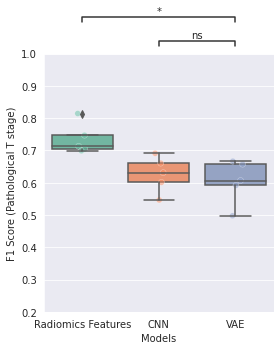

<AxesSubplot:xlabel='Models', ylabel='F1 Score (Pathological T stage)'>

In [70]:
plot_box(data, box_pairs=[("VAE", "CNN"), ("VAE", "Radiomics Features")], ylim=(0.2, 1),
    save_path=f"/labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_{label_name}.pdf", 
    xlabel="Models", ylabel=f"F1 Score ({label_name})")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.444e-01
Radiomics Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=7.841e-01 stat=-9.047e-01
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_compare_KRAS mutation status.jpeg


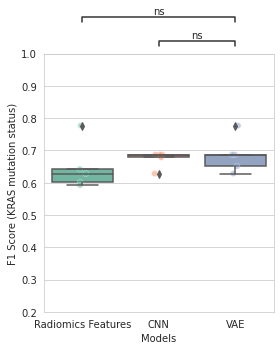

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=0.000e+00
Radiomics Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=8.479e-02 stat=2.412e+00
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_compare_Pleural invasion (elastic, visceral, or parietal).jpeg


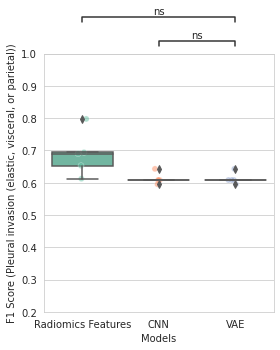

In [73]:
for label in label_list[-2:]:
    label_name = label().name
    vae_label_name = label.__name__.split("Label")[1]
    if vae_label_name == "StfRGLymphInvasion":
        vae_label_name = "StfLymphInvasion"
    if vae_label_name == "StfRGPleuralInvasion":
        vae_label_name = "StfPleuralInvasion"
    pyra_metrics = pd.read_csv(osp.join(pyradiomics_result, f"results_xgboost_{label_name}.csv"))
    cnn_metrics = pd.DataFrame(read_json(osp.join(cnn_result, f"{label_name}.json")))
    vae_metrics = read_json(osp.join(vae_result_dir, f"{vae_label_name}.cv_result_dict.json"))["xgboost"]
    data=pd.DataFrame({"Radiomics Features": pyra_metrics["F1"], "CNN": cnn_metrics["F1"], "VAE": vae_metrics["F1"]})
    plot_box(data, save_path=f"/labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_compare_{label_name}.jpeg", 
            xlabel="Models", ylabel=f"F1 Score ({label_name})", 
            box_pairs=[("VAE", "CNN"), ("VAE", "Radiomics Features")], ylim=(0.2, 1),)

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_Pathological T stage.jpeg


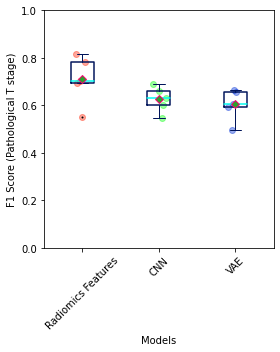

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_Pathological N stage.jpeg


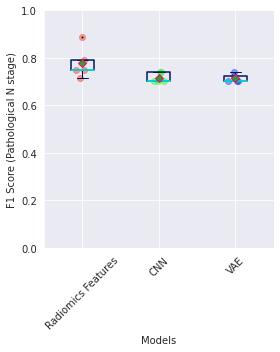

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_AJCC Staging (Version 7).jpeg


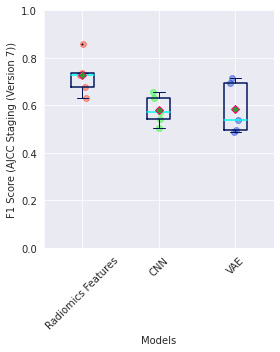

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_Histopathological Grade.jpeg


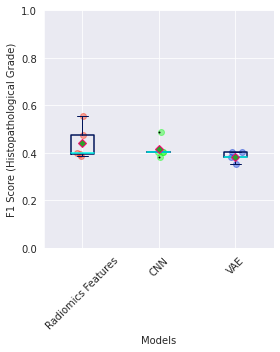

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_Lymphovascular invasion.jpeg


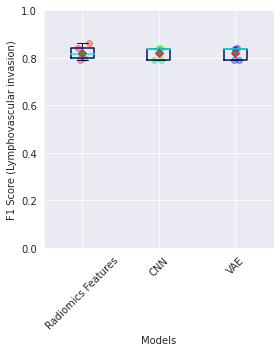

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_EGFR mutation status.jpeg


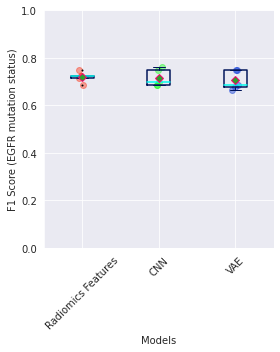

saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_KRAS mutation status.jpeg


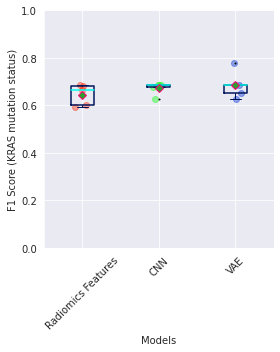

FileNotFoundError: [Errno 2] No such file or directory: '/labs/gevaertlab/users/yyhhli/code/vae/baselines/cnn/results/Pleural invasion (elastic, visceral, or parietal).json'

In [11]:
for label in label_list:
    label_name = label().name
    vae_label_name = label.__name__.split("Label")[1]
    if vae_label_name == "StfRGLymphInvasion":
        vae_label_name = "StfLymphInvasion"
    pyra_metrics = pd.read_csv(osp.join(pyradiomics_result, f"pyradiomics_default_results_xgboost_{label_name}.csv"))
    cnn_metrics = pd.DataFrame(read_json(osp.join(cnn_result, f"{label_name}.json")))
    vae_metrics = read_json(osp.join(vae_result_dir, f"{vae_label_name}.cv_result_dict.json"))["xgboost"]
    data=pd.DataFrame({"Radiomics Features": pyra_metrics["F1"], "CNN": cnn_metrics["F1"], "VAE": vae_metrics["F1"]})
    plot_box(data, save_path=f"/labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_compare_{label_name}.jpeg", 
    xlabel="Models", 
    ylabel=f"F1 Score ({label_name})", 
    ylim=(0, 1))

In [9]:
## 10 Fold version
f = 10
from utils.visualization import vis_result_boxplot
for label in label_list[-2:]:
    label_name = label().name
    vae_label_name = label.__name__.split("Label")[1]
    if vae_label_name == "StfRGLymphInvasion":
        vae_label_name = "StfLymphInvasion"
    if vae_label_name == "StfRGPleuralInvasion":
        vae_label_name = "StfPleuralInvasion"
    pyra_metrics = pd.read_csv(osp.join(pyradiomics_result, f"pyradiomics_default_results_xgboost_{label_name}_fold{f}.csv"))
    cnn_metrics = pd.DataFrame(read_json(osp.join(cnn_result, f"{label_name}.json")))
    vae_metrics = read_json(osp.join(vae_result_dir, f"{vae_label_name}.cv_result_dict.json"))["xgboost"]
    data=pd.DataFrame({"Radiomics Features": pyra_metrics["F1"], "CNN": cnn_metrics["F1"], "VAE": vae_metrics["F1"]})
    vis_result_boxplot(data, save_path=f"/labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_compare_{label_name}.jpeg", 
            xlabel="Models", ylabel=f"F1 Score ({label_name})", 
            box_pairs=[("VAE", "CNN"), ("VAE", "Radiomics Features")], ylim=(0.2, 1),)

FileNotFoundError: [Errno 2] No such file or directory: '/labs/gevaertlab/users/yyhhli/code/vae/baselines/pyradiomics/results/results_xgboost_KRAS mutation status_fold10.csv'